<a href="https://colab.research.google.com/github/rizqi4indra/python-sentianalysis-id/blob/master/4_3_Stem_OS_SMOTE_RS_Greet%2BStreet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
#from tqdm import tqdm
#tqdm.pandas()
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_excel('data-stem/Stem-data_ready-SlangGreetStreet.xlsx')
train = pd.read_excel('data-stem/data_train-Stem-SlangGreetStreet-80.xlsx')
test = pd.read_excel('data-stem/data_test-Stem-SlangGreetStreet-20.xlsx')

FileNotFoundError: ignored

### Feature Extraction

In [ ]:
encoder = TfidfVectorizer()

In [ ]:
#encoder.fit(data['Isi'])

In [ ]:
# save semua baris loadingnya lama
#data_tfidf_corpus.to_excel("data/data_corpus_tfidf.xlsx", index=False)

In [ ]:
# Define feature and target
X_train = train['Isi'].values
y_train = train['Kategori'].values
X_test = test['Isi'].values
y_test = test['Kategori'].values

In [ ]:
# Transform tfidf to vector
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [ ]:
X_train_enc.shape, X_test_enc.shape

((1716, 4914), (430, 4914))

### Data Modeling

In [ ]:
from time import time
#from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import randint

from imblearn.over_sampling import SMOTE

from pycm import *

## SMOTE

In [ ]:
sm = SMOTE(random_state = 42)

In [ ]:
X_train_enc_sm, y_train = sm.fit_resample(X_train_enc, y_train)
#X_test_enc_sm, y_test = sm.fit_resample(X_test_enc, y_test)

In [ ]:
X_train_enc_sm.shape, X_test_enc.shape

((4980, 4914), (430, 4914))

### SMOTE-Naive Bayes

In [ ]:
model_mnb_sm = MultinomialNB()
model_mnb_sm.fit(X_train_enc_sm, y_train)

MultinomialNB()

In [ ]:
paramsm_nb = {'alpha': uniform(0, 10)}

In [ ]:
rs_mnb_sm = RandomizedSearchCV(model_mnb_sm, param_distributions=paramsm_nb, cv=5, n_iter = 10)

In [ ]:
start = time()
rs_mnb_sm.fit(X_train_enc_sm, y_train)
print(f"Time Estimate: {time() - start}")

Time Estimate: 0.9879231452941895


In [ ]:
print("Best score: %0.3f" % rs_mnb_sm.best_score_)
print("Best parameters set:")
best_parameters = rs_mnb_sm.best_estimator_.get_params()
for param_name in sorted(paramsm_nb.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.916
Best parameters set:
	alpha: 2.506466580268103


In [ ]:
sm_mnb_rs = rs_mnb_sm.best_estimator_

In [ ]:
sm_mnb_rs.fit(X_train_enc_sm, y_train)

MultinomialNB(alpha=2.506466580268103)

In [ ]:
preds_train = sm_mnb_rs.predict(X_train_enc_sm)
print(classification_report(y_train, preds_train))

                                        precision    recall  f1-score   support

                           apill, lpju       0.93      0.98      0.95       498
                         infrastruktur       0.97      0.94      0.95       498
      kesejahteraan dan masalah sosial       0.96      1.00      0.98       498
                       ketenagakerjaan       0.86      1.00      0.93       498
                       ketertiban umum       0.94      0.78      0.85       498
             layanan informasi dan tik       0.99      0.93      0.96       498
                     layanan kesehatan       0.94      0.82      0.87       498
                      lingkungan hidup       0.96      0.99      0.98       498
pelayanan perhubungan dan transportasi       0.92      0.95      0.93       498
                            pendidikan       0.94      1.00      0.97       498

                              accuracy                           0.94      4980
                             macro avg

In [ ]:
preds_test = sm_mnb_rs.predict(X_test_enc)
print(classification_report(y_test, preds_test))

                                        precision    recall  f1-score   support

                           apill, lpju       0.82      0.91      0.87        46
                         infrastruktur       0.87      0.89      0.88        53
      kesejahteraan dan masalah sosial       0.83      0.71      0.77        14
                       ketenagakerjaan       0.44      0.92      0.59        12
                       ketertiban umum       0.89      0.74      0.81       125
             layanan informasi dan tik       0.94      0.65      0.77        26
                     layanan kesehatan       0.85      0.84      0.85        82
                      lingkungan hidup       0.74      1.00      0.85        17
pelayanan perhubungan dan transportasi       0.77      0.80      0.79        41
                            pendidikan       0.68      0.93      0.79        14

                              accuracy                           0.82       430
                             macro avg

In [ ]:
cm_test = ConfusionMatrix(actual_vector=y_test, predict_vector=preds_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

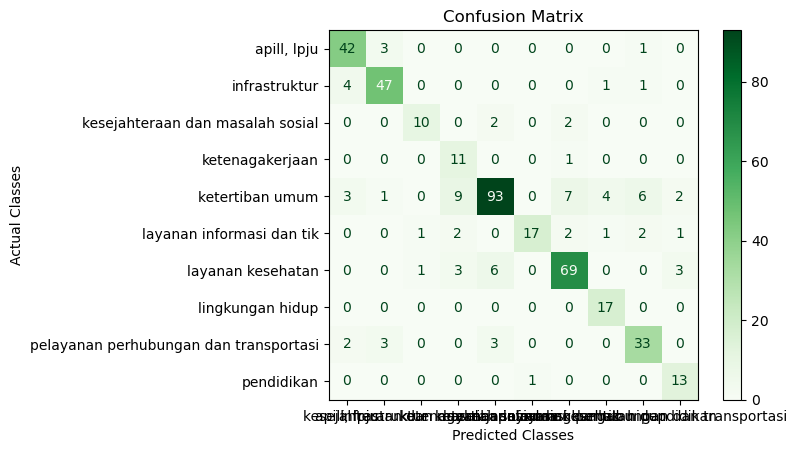

In [ ]:
cm_test.plot(cmap = plt.cm.Greens, number_label = True, plot_lib = "matplotlib")

### SMOTE-SVM

In [ ]:
model_svm_sm = SVC()
model_svm_sm.fit(X_train_enc_sm, y_train)

SVC()

In [ ]:
params_svm = {'C': uniform(0.1, 100), 'kernel':['rbf', 'linear'], 'decision_function_shape':['ovo','ovr']}

In [ ]:
rs_svc_sm = RandomizedSearchCV(model_svm_sm, param_distributions= params_svm, cv=5, n_iter= 10)

In [ ]:
start = time()
rs_svc_sm.fit(X_train_enc_sm, y_train)
print(f"Time Estimate: {time() - start}")

Time Estimate: 129.82708835601807


In [ ]:
print("Best score: %0.3f" % rs_svc_sm.best_score_)
print("Best parameters set:")
best_parameters = rs_svc_sm.best_estimator_.get_params()
for param_name in sorted(params_svm.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.970
Best parameters set:
	C: 50.6512844793389
	decision_function_shape: 'ovo'
	kernel: 'linear'


In [ ]:
sm_svc_rs = rs_svc_sm.best_estimator_

In [ ]:
sm_svc_rs.fit(X_train_enc_sm, y_train)

SVC(C=50.6512844793389, decision_function_shape='ovo', kernel='linear')

In [ ]:
preds_train = sm_svc_rs.predict(X_train_enc_sm)
print(classification_report(y_train, preds_train))

                                        precision    recall  f1-score   support

                           apill, lpju       1.00      1.00      1.00       498
                         infrastruktur       1.00      1.00      1.00       498
      kesejahteraan dan masalah sosial       1.00      1.00      1.00       498
                       ketenagakerjaan       1.00      1.00      1.00       498
                       ketertiban umum       1.00      1.00      1.00       498
             layanan informasi dan tik       1.00      1.00      1.00       498
                     layanan kesehatan       1.00      1.00      1.00       498
                      lingkungan hidup       1.00      1.00      1.00       498
pelayanan perhubungan dan transportasi       1.00      1.00      1.00       498
                            pendidikan       1.00      1.00      1.00       498

                              accuracy                           1.00      4980
                             macro avg

In [ ]:
preds_test = sm_svc_rs.predict(X_test_enc)
print(classification_report(y_test, preds_test))

                                        precision    recall  f1-score   support

                           apill, lpju       0.95      0.87      0.91        46
                         infrastruktur       0.84      0.89      0.86        53
      kesejahteraan dan masalah sosial       0.86      0.43      0.57        14
                       ketenagakerjaan       0.77      0.83      0.80        12
                       ketertiban umum       0.79      0.86      0.82       125
             layanan informasi dan tik       0.78      0.69      0.73        26
                     layanan kesehatan       0.85      0.88      0.86        82
                      lingkungan hidup       1.00      0.82      0.90        17
pelayanan perhubungan dan transportasi       0.78      0.78      0.78        41
                            pendidikan       0.92      0.86      0.89        14

                              accuracy                           0.83       430
                             macro avg

In [ ]:
cm_test = ConfusionMatrix(actual_vector=y_test, predict_vector=preds_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

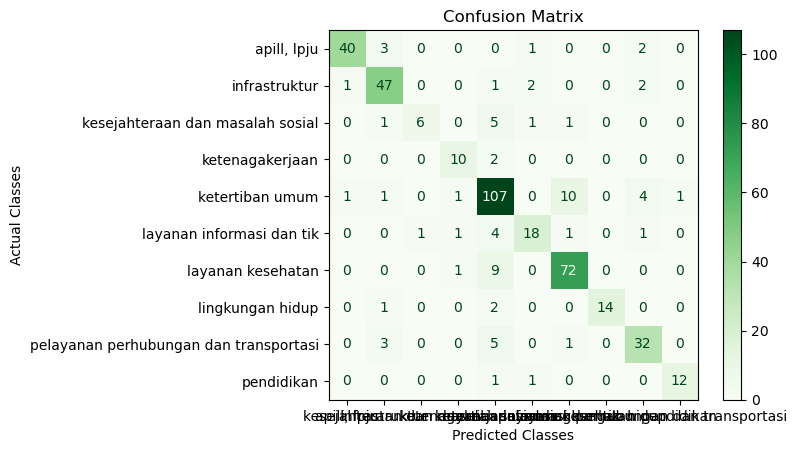

In [ ]:
cm_test.plot(cmap = plt.cm.Greens, number_label = True, plot_lib = "matplotlib")

### KNN

In [ ]:
model_knn_sm = KNeighborsClassifier()
model_knn_sm.fit(X_train_enc_sm, y_train)

KNeighborsClassifier()

In [ ]:
paramk_knn = {'n_neighbors': randint(3, 30), 'p': [1,2], 'metric': ['minkowski', 'euclidean']}

In [ ]:
gs_knn_sm = RandomizedSearchCV(model_knn_sm, param_distributions=paramk_knn, cv=5, n_iter = 30)

In [ ]:
start = time()
gs_knn_sm.fit(X_train_enc_sm, y_train)
print(f"Time Estimate: {time() - start}")

Time Estimate: 190.30930733680725


In [ ]:
print("Best score: %0.3f" % gs_knn_sm.best_score_)
print("Best parameters set:")
best_parameters = gs_knn_sm.best_estimator_.get_params()
for param_name in sorted(paramk_knn.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.895
Best parameters set:
	metric: 'minkowski'
	n_neighbors: 3
	p: 2


In [ ]:
sm_knn_grid = gs_knn_sm.best_estimator_

In [ ]:
preds_train = sm_knn_grid.predict(X_train_enc_sm)
print(classification_report(y_train, preds_train))

                                        precision    recall  f1-score   support

                           apill, lpju       0.96      0.99      0.98       498
                         infrastruktur       0.96      0.99      0.97       498
      kesejahteraan dan masalah sosial       0.95      1.00      0.97       498
                       ketenagakerjaan       0.89      1.00      0.94       498
                       ketertiban umum       0.97      0.57      0.71       498
             layanan informasi dan tik       0.93      1.00      0.96       498
                     layanan kesehatan       0.94      0.90      0.92       498
                      lingkungan hidup       0.98      1.00      0.99       498
pelayanan perhubungan dan transportasi       0.93      1.00      0.96       498
                            pendidikan       0.96      1.00      0.98       498

                              accuracy                           0.94      4980
                             macro avg

In [ ]:
preds_test = sm_knn_grid.predict(X_test_enc)
print(classification_report(y_test, preds_test))

                                        precision    recall  f1-score   support

                           apill, lpju       0.77      0.96      0.85        46
                         infrastruktur       0.80      0.81      0.80        53
      kesejahteraan dan masalah sosial       0.53      0.71      0.61        14
                       ketenagakerjaan       0.33      0.92      0.49        12
                       ketertiban umum       0.96      0.34      0.51       125
             layanan informasi dan tik       0.47      0.81      0.59        26
                     layanan kesehatan       0.81      0.73      0.77        82
                      lingkungan hidup       0.77      1.00      0.87        17
pelayanan perhubungan dan transportasi       0.64      0.85      0.73        41
                            pendidikan       0.46      0.86      0.60        14

                              accuracy                           0.69       430
                             macro avg

In [ ]:
cm_test = ConfusionMatrix(actual_vector=y_test, predict_vector=preds_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

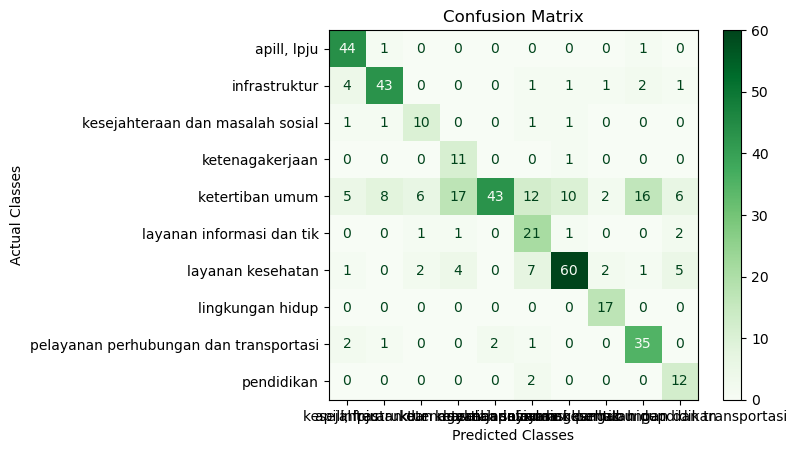

In [ ]:
cm_test.plot(cmap = plt.cm.Greens, number_label = True, plot_lib = "matplotlib")

### Random Forest

In [ ]:
model_rf_sm = RandomForestClassifier()
model_rf_sm.fit(X_train_enc_sm, y_train)

RandomForestClassifier()

In [ ]:
param_rs_rf = {'n_estimators': randint(10,100), 'criterion': ['gini', 'entropy', 'log_loss']}

In [ ]:
rs_rf = RandomizedSearchCV(model_rf_sm, param_distributions = param_rs_rf, cv=5, n_iter=10)

In [ ]:
start = time()
rs_rf.fit(X_train_enc_sm, y_train)
print(f"Time Estiate: {time() - start}")

Time Estiate: 178.46870112419128


In [ ]:
print("Best score: %0.3f" % rs_rf.best_score_)
print("Best parameters set:")
best_parameters = rs_rf.best_estimator_.get_params()
for param_name in sorted(param_rs_rf.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.951
Best parameters set:
	criterion: 'gini'
	n_estimators: 85


In [ ]:
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 85,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_grid = rs_rf.best_estimator_

In [ ]:
rf_grid.fit(X_train_enc_sm, y_train)

RandomForestClassifier(n_estimators=85)

In [ ]:
preds_train = rf_grid.predict(X_train_enc_sm)
print(classification_report(y_train, preds_train))

                                        precision    recall  f1-score   support

                           apill, lpju       1.00      1.00      1.00       498
                         infrastruktur       1.00      1.00      1.00       498
      kesejahteraan dan masalah sosial       1.00      1.00      1.00       498
                       ketenagakerjaan       1.00      1.00      1.00       498
                       ketertiban umum       1.00      1.00      1.00       498
             layanan informasi dan tik       1.00      1.00      1.00       498
                     layanan kesehatan       1.00      1.00      1.00       498
                      lingkungan hidup       1.00      1.00      1.00       498
pelayanan perhubungan dan transportasi       1.00      1.00      1.00       498
                            pendidikan       1.00      1.00      1.00       498

                              accuracy                           1.00      4980
                             macro avg

In [ ]:
preds_test = rf_grid.predict(X_test_enc)
print(classification_report(y_test, preds_test))

                                        precision    recall  f1-score   support

                           apill, lpju       0.84      0.93      0.89        46
                         infrastruktur       0.84      0.91      0.87        53
      kesejahteraan dan masalah sosial       0.75      0.64      0.69        14
                       ketenagakerjaan       0.88      0.58      0.70        12
                       ketertiban umum       0.78      0.78      0.78       125
             layanan informasi dan tik       0.85      0.65      0.74        26
                     layanan kesehatan       0.77      0.88      0.82        82
                      lingkungan hidup       0.82      0.82      0.82        17
pelayanan perhubungan dan transportasi       0.82      0.68      0.75        41
                            pendidikan       0.85      0.79      0.81        14

                              accuracy                           0.80       430
                             macro avg

In [ ]:
cm_test = ConfusionMatrix(actual_vector=y_test, predict_vector=preds_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

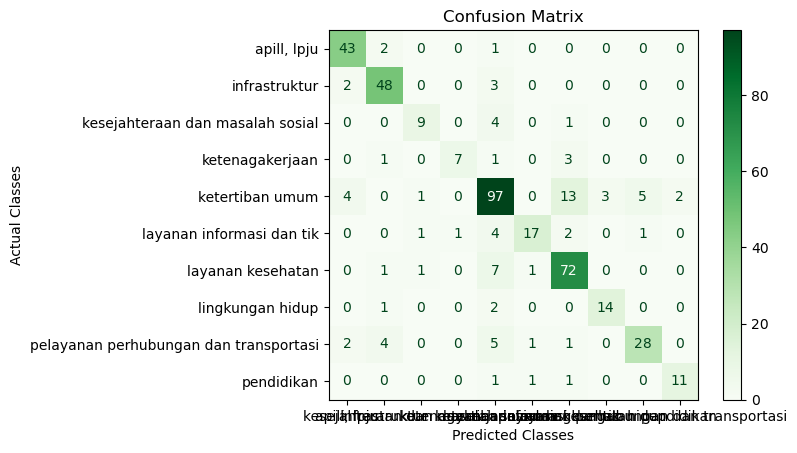

In [ ]:
cm_test.plot(cmap = plt.cm.Greens, number_label = True, plot_lib = "matplotlib")